Let's begin by loading the `plotnine` module; call it `p9` for convenience.

In [0]:
import plotnine as p9

We'll also need `pandas` (call it `pd`):

In [0]:
import pandas as pd

We'll want to connect to the shared Google Drive to get access to our data. Remember, this is always done the same way:

In [3]:
# mount google drive 
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Now load the LABEVENTS.csv and PATIENTS.csv data from MIMIC:

In [0]:
labevents = pd.read_csv("/content/gdrive/My Drive/[YCMI_CBDS Summer Course] Data/mimic_iii/LABEVENTS.csv")
patients = pd.read_csv("/content/gdrive/My Drive/[YCMI_CBDS Summer Course] Data/mimic_iii/PATIENTS.csv")

Take a look at both datasets to get a sense of how it is structured:

In [5]:
labevents

,row_id,subject_id,hadm_id,itemid,charttime,value,valuenum,valueuom,flag
0,6244563,10006,NaN,50868,2164-09-24 20:21:00,19,19.00,mEq/L,NaN
1,6244564,10006,NaN,50882,2164-09-24 20:21:00,27,27.00,mEq/L,NaN
2,6244565,10006,NaN,50893,2164-09-24 20:21:00,10.0,10.00,mg/dL,NaN
3,6244566,10006,NaN,50902,2164-09-24 20:21:00,97,97.00,mEq/L,NaN
4,6244567,10006,NaN,50912,2164-09-24 20:21:00,7.0,7.00,mg/dL,abnormal
...,...,...,...,...,...,...,...,...,...
76069,20452679,44228,103379.0,51250,2170-12-24 04:09:00,88,88.00,fL,NaN
76070,20452680,44228,103379.0,51265,2170-12-24 04:09:00,595,595.00,K/uL,abnormal
76071,20452681,44228,103379.0,51277,2170-12-24 04:09:00,14.5,14.50,%,NaN
76072,20452682,44228,103379.0,51279,2170-12-24 04:09:00,2.76,2.76,m/uL,abnormal


In [6]:
patients

,row_id,subject_id,gender,dob,dod,dod_hosp,dod_ssn,expire_flag
0,9467,10006,F,2094-03-05 00:00:00,2165-08-12 00:00:00,2165-08-12 00:00:00,2165-08-12 00:00:00,1
1,9472,10011,F,2090-06-05 00:00:00,2126-08-28 00:00:00,2126-08-28 00:00:00,NaN,1
2,9474,10013,F,2038-09-03 00:00:00,2125-10-07 00:00:00,2125-10-07 00:00:00,2125-10-07 00:00:00,1
3,9478,10017,F,2075-09-21 00:00:00,2152-09-12 00:00:00,NaN,2152-09-12 00:00:00,1
4,9479,10019,M,2114-06-20 00:00:00,2163-05-15 00:00:00,2163-05-15 00:00:00,2163-05-15 00:00:00,1
...,...,...,...,...,...,...,...,...
95,31838,44083,M,2057-11-15 00:00:00,2114-02-20 00:00:00,2114-02-20 00:00:00,2114-02-20 00:00:00,1
96,31853,44154,M,1878-05-14 00:00:00,2178-05-15 00:00:00,2178-05-15 00:00:00,2178-05-15 00:00:00,1
97,31867,44212,F,2078-06-16 00:00:00,2124-01-29 00:00:00,NaN,2124-01-29 00:00:00,1
98,31870,44222,M,2107-06-27 00:00:00,2182-08-03 00:00:00,2182-08-03 00:00:00,NaN,1


In the `labevents` dataframe, the `charttime` column represents date and time. Use `pd.to_datetime` to tell the computer this:

In [0]:
labevents['charttime'] = pd.to_datetime(labevents['charttime'])

### Bar chart

Let's start simply: Make a bar chart showing the `gender` data from `patients`. You should end up with two bars: one for `M` one for `F`. Which gender is more common in our dataset?

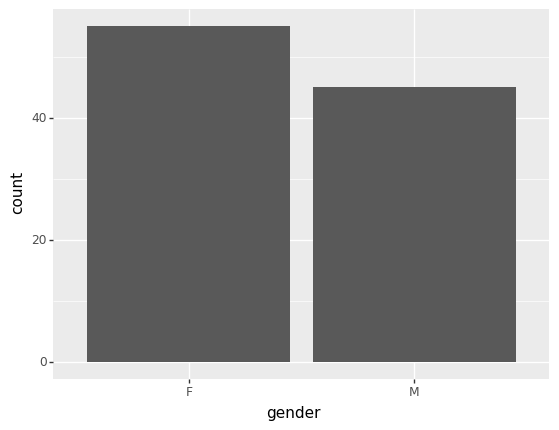

<ggplot: (8759548508231)>

In [8]:
p9.ggplot(patients, p9.aes(x='gender')) + p9.geom_bar()

### Time series

Select blood potassium concentration in mEq/L (`itemid == 50971`) for patient `40310`.


In [0]:
my_data = labevents[(labevents['subject_id'] == 40310) & (labevents['itemid'] == 50971)]

Make a line graph of the measurements (`valuenum`) vs date (`charttime`). Note that ggplot automatically handles timestamps; we do not need to do anything special for dates.

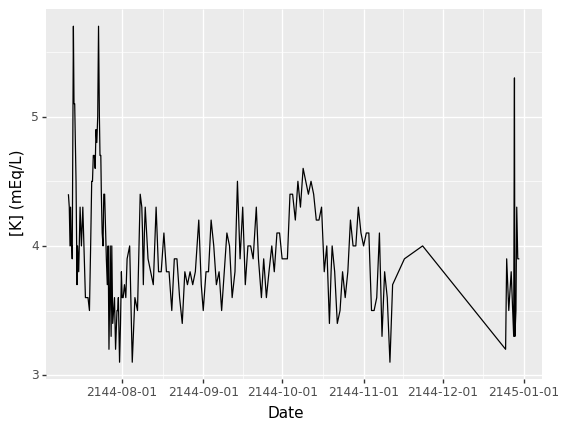

<ggplot: (-9223363277307518106)>

In [10]:
p9.ggplot(my_data, p9.aes(x='charttime', y='valuenum')) + p9.geom_line() + p9.labs(x='Date', y='[K] (mEq/L)') 

Did you give your graph meaningful x- and y-axis labels? If not, redo it but with labels "Date" for the x-axis and "[K] (mEq/L)" for the y-axis (you'll want to use `p9.labs`).

How do you interpret the graph between mid-November and late December? Are there any time periods that stand out as not being like the rest?

**PUT YOUR ANSWER HERE**

### Box plot

So far we've seen how one particular person's blood potassium concentration changed over time.

Let's instead try to get a sense of the variability of blood sodium concentrations (`labevents['itemid'] == 50983`) within individuals but also how individuals compare. To do this, we'll use a boxplot (`geom_boxplot`). Specifically, make a boxplot that `group`s by `subject_id`, plots the concentrations (`valuenum`) along the y-axis, and positions the box across the x-axis beased on `subject_id`. To keep the graph readable, only include data for `subject_id < 20000`.

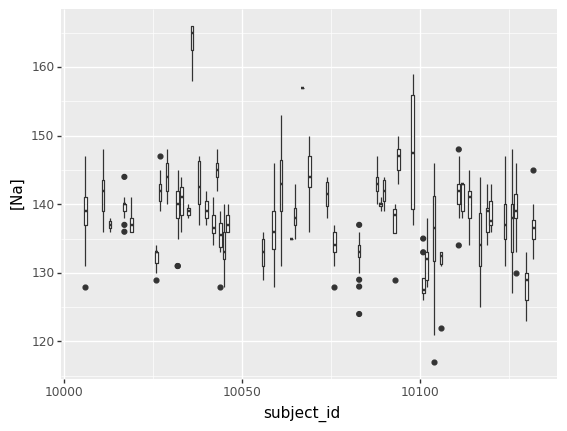

<ggplot: (8759573823012)>

In [11]:
p9.ggplot(labevents[(labevents['itemid'] == 50983) & (labevents['subject_id'] < 20000)], p9.aes(x='subject_id', y='valuenum', group='subject_id')) + p9.geom_boxplot() + p9.labs(y='[Na]')

Did you see any patients whose blood sodium levels seem unusual relative to the rest? (e.g. unusually high, unusually low, or unusually variable).

**Your answer here**

### Scatter plot

Let's load the clinical data from the Verana Health challenge:




In [0]:
verana = pd.read_csv("/content/gdrive/My Drive/[YCMI_CBDS Summer Course] Data/verana_health/patient_clinical.csv")

As always, start by looking at the data to get a sense of what it contains:

In [13]:
verana

,patient_id,diagnosis_code,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,KTL2DSJHL4SDNB9542T487EN4,719520001,195.0,106.0,70.0,26.97,80.0,77.0,0
1,EJWLMX3E4GUHSZJHNSY8ZQA9F,763387005,250.0,121.0,81.0,28.73,95.0,76.0,0
2,4P9XZP35HB43N2LN6SNYCTQ6C,231996009,245.0,127.5,80.0,25.34,75.0,70.0,0
3,2C24GKDFF9LYAADZNDJ4UMCLH,312921000,225.0,150.0,95.0,28.58,65.0,103.0,1
4,WCYHBETYRVUD4ATKEXDEPQ9UW,H35.35,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...
4226,WHQQRKWQZWMYPNZJ6AVTP65V2,408849009,248.0,131.0,72.0,22.00,84.0,86.0,0
4227,KWGQLTX8PAPKWW9S4LEKVAKJK,408850009,210.0,126.5,87.0,19.16,86.0,NaN,0
4228,NW4KMWEQSU99ZEAYK2DMPNBEQ,408851008,269.0,133.5,83.0,21.47,80.0,107.0,0
4229,J563NFLAS8227VQKM3NDSSSMQ,NaN,185.0,141.0,98.0,25.60,67.0,72.0,0


Make a scatter plot showing the relationship of `diaBP` and `sysBP` in the `verana` data.


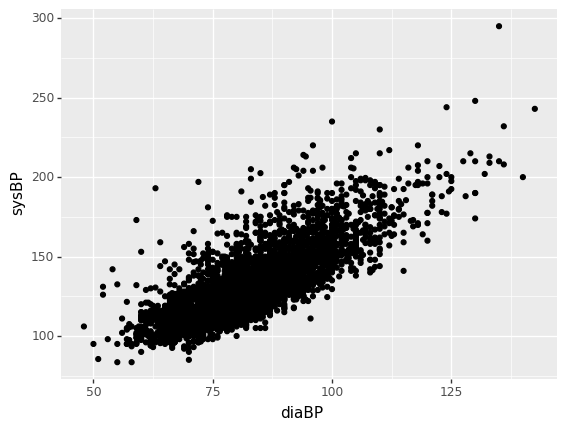

<ggplot: (8759544625917)>

In [14]:
p9.ggplot(verana, p9.aes(x='diaBP', y='sysBP')) + p9.geom_point()

There are so many points, it's hard to see where the most likely values are in the basic scatter plot. To get a better sense, add a `p9.geom_density_2d` to overlay a contour map of the point density. Specify a `color` so that it stands out:

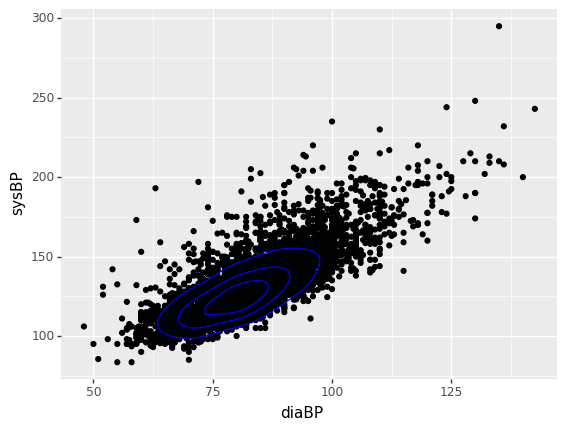

<ggplot: (8759544182981)>

In [15]:
p9.ggplot(verana, p9.aes(x='diaBP', y='sysBP')) + p9.geom_point() + p9.geom_density_2d(color='blue')

Finally, let's add a smoothed curve `p9.geom_smooth` showing the overall trend. Again, specify a color so that you can see the trend curve:

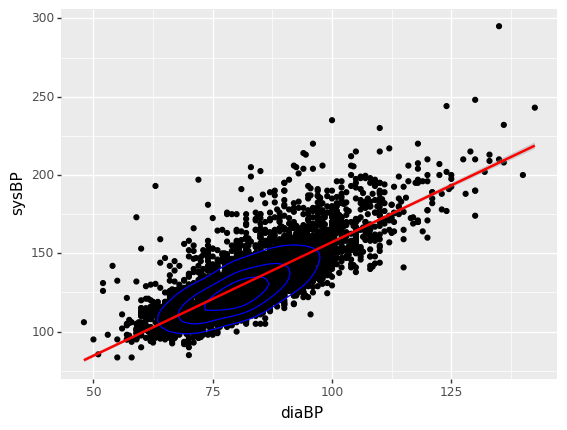

<ggplot: (-9223363277310465918)>

In [16]:
p9.ggplot(verana, p9.aes(x='diaBP', y='sysBP')) + p9.geom_point() + p9.geom_density_2d(color='blue') + p9.geom_smooth(color='red')